In [82]:
import pandas as pd
import seaborn as sb   
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC

In [83]:
df = pd.read_csv('players.csv')
df

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
0,1630173,Precious,Achiuwa,Forward,6-8,225,1999-09-19,Nigeria,Memphis,2020,1.0,20.0
1,203500,Steven,Adams,Center,6-11,265,1993-07-20,New Zealand,Pittsburgh,2013,1.0,12.0
2,1628389,Bam,Adebayo,Center-Forward,6-9,255,1997-07-18,USA,Kentucky,2017,1.0,14.0
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
4,1630583,Santi,Aldama,Forward-Center,7-0,215,2001-01-10,Spain,Loyola-Maryland,2021,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
543,201152,Thaddeus,Young,Forward,6-8,235,1988-06-21,USA,Georgia Tech,2007,1.0,12.0
544,1629027,Trae,Young,Guard,6-1,164,1998-09-19,USA,Oklahoma,2018,1.0,5.0
545,1630209,Omer,Yurtseven,Center,6-11,275,1998-06-19,Turkey,Georgetown,2020,NaN,NaN
546,203469,Cody,Zeller,Forward-Center,6-11,240,1992-10-05,USA,Indiana,2013,1.0,4.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerid      548 non-null    int64  
 1   fname         548 non-null    object 
 2   lname         548 non-null    object 
 3   position      548 non-null    object 
 4   height        548 non-null    object 
 5   weight        548 non-null    int64  
 6   birthday      548 non-null    object 
 7   country       548 non-null    object 
 8   school        538 non-null    object 
 9   draft_year    548 non-null    int64  
 10  draft_round   409 non-null    float64
 11  draft_number  408 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 51.5+ KB


In [85]:
df.head(10)

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
0,1630173,Precious,Achiuwa,Forward,6-8,225,1999-09-19,Nigeria,Memphis,2020,1.0,20.0
1,203500,Steven,Adams,Center,6-11,265,1993-07-20,New Zealand,Pittsburgh,2013,1.0,12.0
2,1628389,Bam,Adebayo,Center-Forward,6-9,255,1997-07-18,USA,Kentucky,2017,1.0,14.0
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
4,1630583,Santi,Aldama,Forward-Center,7-0,215,2001-01-10,Spain,Loyola-Maryland,2021,1.0,30.0
5,1629638,Nickeil,Alexander-Walker,Guard,6-5,205,1998-09-02,Canada,Virginia Tech,2019,1.0,17.0
6,1628960,Grayson,Allen,Guard,6-4,198,1995-10-08,USA,Duke,2018,1.0,21.0
7,1628386,Jarrett,Allen,Center,6-9,243,1998-04-21,USA,Texas,2017,1.0,22.0
8,1630631,Jose,Alvarado,Guard,6-0,179,1998-04-12,USA,Georgia Tech,2021,NaN,NaN
9,203937,Kyle,Anderson,Forward-Guard,6-9,230,1993-09-20,USA,UCLA,2014,1.0,30.0


In [86]:
#Making a subset
newdf = df[['playerid','fname','lname','weight','draft_year','country','draft_round','position','height']]
newdf

,playerid,fname,lname,weight,draft_year,country,draft_round,position,height
0,1630173,Precious,Achiuwa,225,2020,Nigeria,1.0,Forward,6-8
1,203500,Steven,Adams,265,2013,New Zealand,1.0,Center,6-11
2,1628389,Bam,Adebayo,255,2017,USA,1.0,Center-Forward,6-9
3,1630534,Ochai,Agbaji,215,2022,USA,1.0,Guard,6-5
4,1630583,Santi,Aldama,215,2021,Spain,1.0,Forward-Center,7-0
...,...,...,...,...,...,...,...,...,...
543,201152,Thaddeus,Young,235,2007,USA,1.0,Forward,6-8
544,1629027,Trae,Young,164,2018,USA,1.0,Guard,6-1
545,1630209,Omer,Yurtseven,275,2020,Turkey,NaN,Center,6-11
546,203469,Cody,Zeller,240,2013,USA,1.0,Forward-Center,6-11


In [87]:
# Here I am making a subset that will only include information starting from the year 2019 and going up.
newdf = df[(df['country'] == 'USA') & (df['draft_year'] >= 2019)]

In [88]:
df_schools_2020 = df[(df['country'] == 'USA') & (df['draft_year'] == 2020)]

In [89]:
newdf.head(5)

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
8,1630631,Jose,Alvarado,Guard,6-0,179,1998-04-12,USA,Georgia Tech,2021,NaN,NaN
13,1630175,Cole,Anthony,Guard,6-3,185,2000-05-15,USA,North Carolina,2020,1.0,15.0
22,1631116,Patrick,Baldwin,Forward,6-9,220,2002-11-18,USA,Wisconsin-Milwaukee,2022,1.0,28.0
23,1630163,LaMelo,Ball,Guard,6-7,180,2001-08-22,USA,Illawarra,2020,1.0,3.0


In [90]:
newdf.isnull().sum()


playerid         0
fname            0
lname            0
position         0
height           0
weight           0
birthday         0
country          0
school           3
draft_year       0
draft_round     80
draft_number    80
dtype: int64

In [91]:
newdf.dropna(subset=['school','draft_round','draft_year'], inplace=True)
newdf['school'].isnull().sum()



C:\Users\eddyk\AppData\Local\Temp\ipykernel_37216\2632350062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(subset=['school','draft_round','draft_year'], inplace=True)


0

In [92]:
# Using this info I will create a seperate excel sheet that will include the schools and their regions.
#That way when I graph the dataset, it will be able to read and understood clearly

df['school'].unique()

array(['Memphis', 'Pittsburgh', 'Kentucky', 'Kansas', 'Loyola-Maryland',
       'Virginia Tech', 'Duke', 'Texas', 'Georgia Tech', 'UCLA',
       'Filathlitikos', 'University of Dayton', 'Panathinaikos',
       'North Carolina', 'Indiana', 'Villanova',
       'University of Texas at Austin', 'Maccabi Tel Aviv', 'Arizona',
       'FC Barcelona', 'Wisconsin-Milwaukee', 'Illawarra', 'TCU',
       'Nebraska', nan, 'Florida State', 'Western Kentucky', 'Ohio State',
       'Le Mans', 'Princeton HS (OH)', 'Florida', 'NBA G League Ignite',
       'Baskonia', 'Arkansas', 'UNLV', 'Mega Basket',
       'Baloncesto Fuenlabrada', 'Syracuse', 'Fenerbahce', 'Oregon',
       'Connecticut', 'San Francisco', 'College of Charleston',
       'Virginia', 'Miami', 'California', 'Baylor', 'Southern Methodist',
       'Colorado', 'Iowa State', 'Marquette', 'Oakland', 'Georgia',
       'San Pablo Burgos', 'Elan Chalon', 'West Virginia', 'Texas A&M',
       "St. John's", 'Tennessee', 'Michigan State', 'Arizona S

In [93]:
#Reading the excel sheet I made
df_regions = pd.read_csv('player_regions.csv')

In [94]:
#Grouped both dataframes together based on school.
#Now I am merging the two dataframes

merged_df = pd.merge(newdf, df_regions, on='school', how='right', suffixes=('_left','_right'))

In [95]:
merged_df_2020 = pd.merge(df_schools_2020, df_regions, on='school', how='right', suffixes=('_left','_right'))

In [96]:
merged_df_2020 = pd.get_dummies(merged_df_2020, columns=['draft_round'], drop_first=True)
merged_df_2020

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_number,Region_Continent,draft_round_2.0
0,1630176.0,Vernon,Carey Jr.,Center,6-10,270.0,2001-02-25,USA,Duke,2020.0,32.0,SouthEast,1
1,1630200.0,Tre,Jones,Guard,6-1,185.0,2000-01-08,USA,Duke,2020.0,41.0,SouthEast,1
2,1630164.0,James,Wiseman,Center,7-0,240.0,2001-03-31,USA,Memphis,2020.0,2.0,SouthEast,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NorthEast,0
4,1630178.0,Tyrese,Maxey,Guard,6-2,200.0,2000-11-04,USA,Kentucky,2020.0,21.0,SouthEast,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California-Santa Barbara,NaN,NaN,SouthWest,0
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George Washington,NaN,NaN,SouthEast,0
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,NaN,NaN,SouthWest,0
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buffalo,NaN,NaN,NorthEast,0


In [97]:
merged_df = pd.get_dummies(merged_df, columns=['draft_round'], drop_first=True)
merged_df

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_number,Region_Continent,draft_round_2.0
0,1631094.0,Paolo,Banchero,Forward,6-10,250.0,2002-11-12,USA,Duke,2022.0,1.0,SouthEast,0
1,1630176.0,Vernon,Carey Jr.,Center,6-10,270.0,2001-02-25,USA,Duke,2020.0,32.0,SouthEast,1
2,1631100.0,AJ,Griffin,Forward,6-6,220.0,2003-08-25,USA,Duke,2022.0,16.0,SouthEast,0
3,1630552.0,Jalen,Johnson,Forward,6-8,219.0,2001-12-18,USA,Duke,2021.0,20.0,SouthEast,0
4,1630200.0,Tre,Jones,Guard,6-1,185.0,2000-01-08,USA,Duke,2020.0,41.0,SouthEast,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California-Santa Barbara,NaN,NaN,SouthWest,0
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George Washington,NaN,NaN,SouthEast,0
225,1631114.0,Jalen,Williams,Guard-Forward,6-5,211.0,2001-04-14,USA,Santa Clara,2022.0,12.0,SouthWest,0
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buffalo,NaN,NaN,NorthEast,0


In [98]:
count_per_draft_round = merged_df.filter(like='draft_round_').sum(axis=0)

# Display the counts
print(count_per_draft_round)

draft_round_2.0    49
dtype: int64


In [99]:
merged_df[merged_df['lname']=='Curry']['fname']

Series([], Name: fname, dtype: object)

In [100]:
merged_df.head(10)

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_number,Region_Continent,draft_round_2.0
0,1631094.0,Paolo,Banchero,Forward,6-10,250.0,2002-11-12,USA,Duke,2022.0,1.0,SouthEast,0
1,1630176.0,Vernon,Carey Jr.,Center,6-10,270.0,2001-02-25,USA,Duke,2020.0,32.0,SouthEast,1
2,1631100.0,AJ,Griffin,Forward,6-6,220.0,2003-08-25,USA,Duke,2022.0,16.0,SouthEast,0
3,1630552.0,Jalen,Johnson,Forward,6-8,219.0,2001-12-18,USA,Duke,2021.0,20.0,SouthEast,0
4,1630200.0,Tre,Jones,Guard,6-1,185.0,2000-01-08,USA,Duke,2020.0,41.0,SouthEast,1
5,1631211.0,Trevor,Keels,Guard,6-4,221.0,2003-08-26,USA,Duke,2022.0,42.0,SouthEast,1
6,1631111.0,Wendell,Moore Jr.,Guard,6-5,215.0,2001-09-18,USA,Duke,2022.0,26.0,SouthEast,0
7,1629629.0,Cam,Reddish,Forward-Guard,6-7,217.0,1999-09-01,USA,Duke,2019.0,10.0,SouthEast,0
8,1631109.0,Mark,Williams,Center,7-0,240.0,2001-12-16,USA,Duke,2022.0,15.0,SouthEast,0
9,1629627.0,Zion,Williamson,Forward,6-6,284.0,2000-07-06,USA,Duke,2019.0,1.0,SouthEast,0


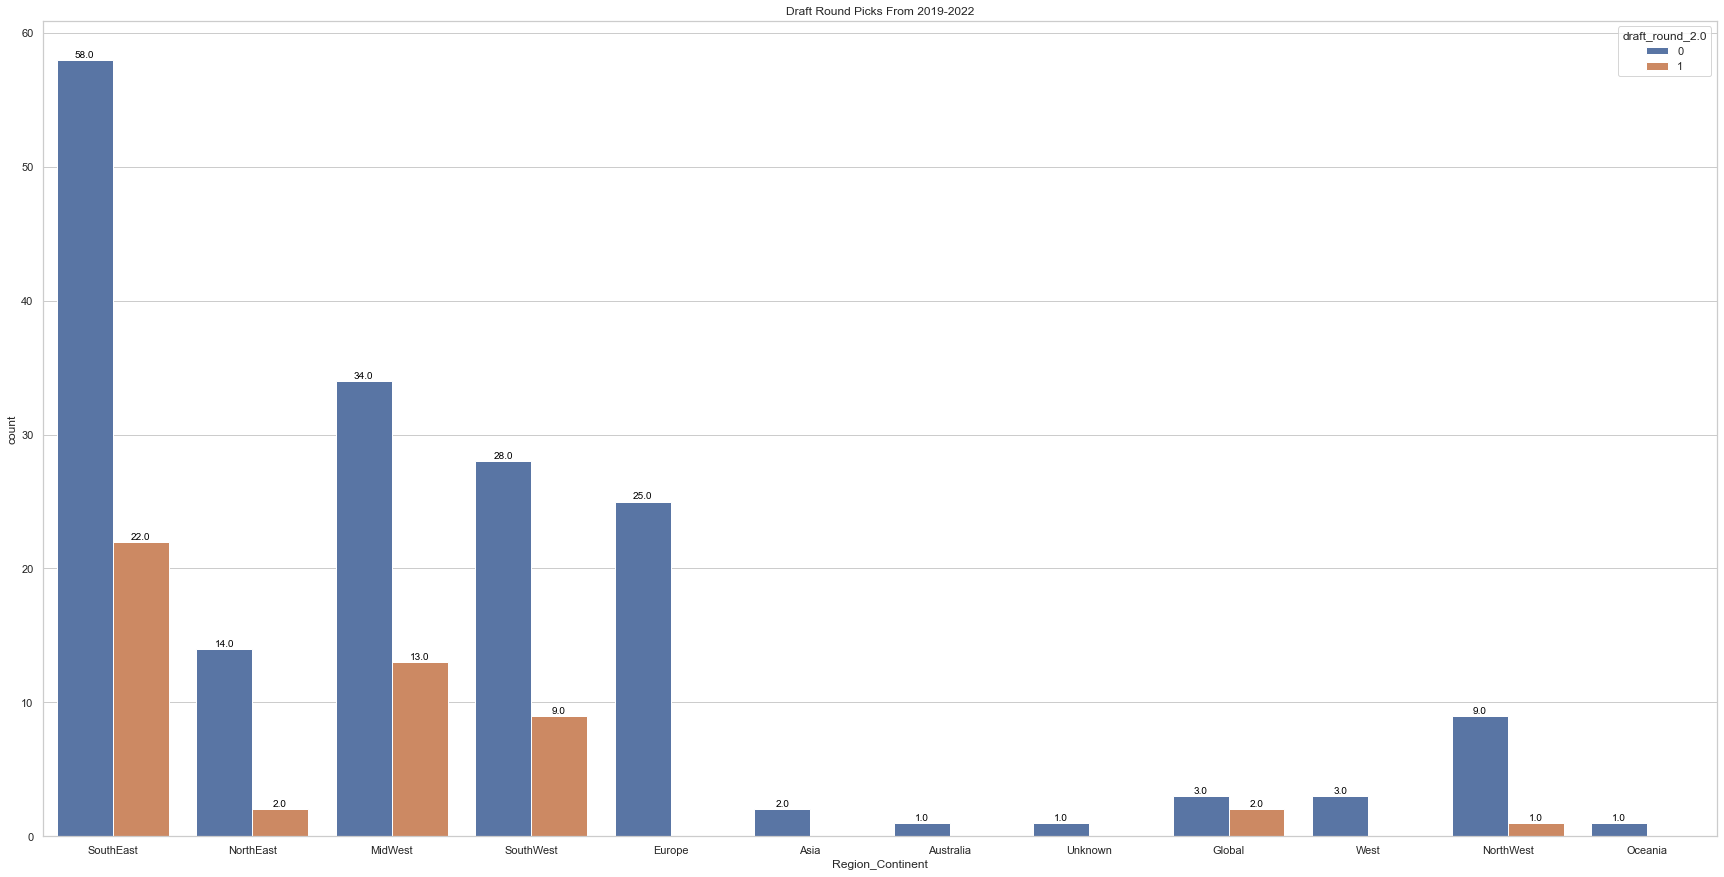

In [101]:
sb.set(style="whitegrid")

# Plotting the count of one-hot encoded 'draft_round' values
plt.figure(figsize=(30, 15))
plt.title('Draft Round Picks From 2019-2022')
plt.xlabel('Draft Round')
plt.ylabel('Count')

ax = sb.countplot(data=merged_df, x='Region_Continent', hue='draft_round_2.0')

# Display count values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

#This graph Diaplays the sum of round 1 = 0 and round 2 = 1 in each Region, Continnt etc starting from 2019 to 2022
#Based on this it shows that the SouthEast region in the United States starting from 2019 - 2022 has had the most Draft Round 1 picks.
#Using this information NBA teams can have and idea of where to look when searching for future prospects.

In [102]:
newdf[newdf['draft_year']==2019]['lname']

36            Bazley
58          Brantley
97           Claxton
108           Culver
160          Gafford
161          Garland
207            Hayes
212            Herro
222    Horton-Tucker
229           Hunter
246           Jerome
249          Johnson
252          Johnson
289         Langford
300           Little
311             Mann
317           Martin
330        McDaniels
353           Morant
371           Nowell
377            Okeke
381           Okpala
395            Poole
396       Porter Jr.
414          Reddish
426             Roby
481         Thybulle
507       Washington
516            White
525         Williams
535       Williamson
536          Windler
Name: lname, dtype: object